<a href="https://colab.research.google.com/github/shyamjith94/OpencvImagemanipulation/blob/main/2_3_2_Histogram_and_Intensity_Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/goldhill.bmp -O goldhill.bmp
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cameraman.jpeg -O cameraman.jpeg
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/zelda.png -O zelda.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/mammogram.png -O mammogram.png

In [2]:
lenna_image = "lenna.png"
baboon_image = "baboon.png"
goldhill_image = "goldhill.bmp"
cameraman_image = "cameraman.jpeg"
zelda_image = "zelda.png"
mammogram_image = "mammogram.png"

In [3]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 

In [4]:
def plot_image(image_1, image_2, title_1="orginal", title_2="new image"):
    plt.figure(figsize=(5,5))
    plt.subplot(1,2,1)
    plt.imshow(image_1, cmap="gray")
    plt.title(title_1)

    plt.subplot(1,2,2)
    plt.imshow(image_2, cmap="gray")
    plt.title(title_2)
    plt.show()


In [5]:
def plot_histgram(old_image, new_image, title_old="orginal", title_new="new image"):
    intensity_values = np.array([x for x in range(256)])
    plt.subplot(1,2,1)
    plt.bar(intensity_values, cv2.calcHist([old_image], [0], None,[256], [0, 256])[:, 0], width=5)
    plt.title(title_old)
    plt.xlabel("intensity_values")

    plt.subplot(1,2,2)
    plt.bar(intensity_values, cv2.calcHist([new_image], [0], None, [256], [0, 256])[:,0], width=5)
    plt.title(title_new)
    plt.xlabel("intensity_values")
    plt.show()


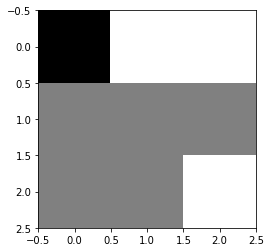

toy_image: [[0 2 2]
 [1 1 1]
 [1 1 2]]


In [6]:
toy_image = np.array([[0,2,2],[1,1,1],[1,1,2]],dtype=np.uint8)
plt.imshow(toy_image, cmap="gray")
plt.show()
print("toy_image:",toy_image)

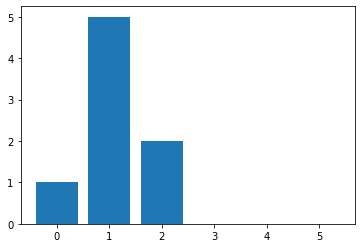

In [7]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

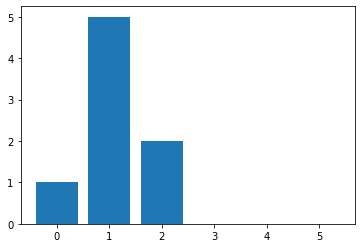

In [8]:
plt.bar([x for x in range(6)],[1,5,2,0,0,0])
plt.show()

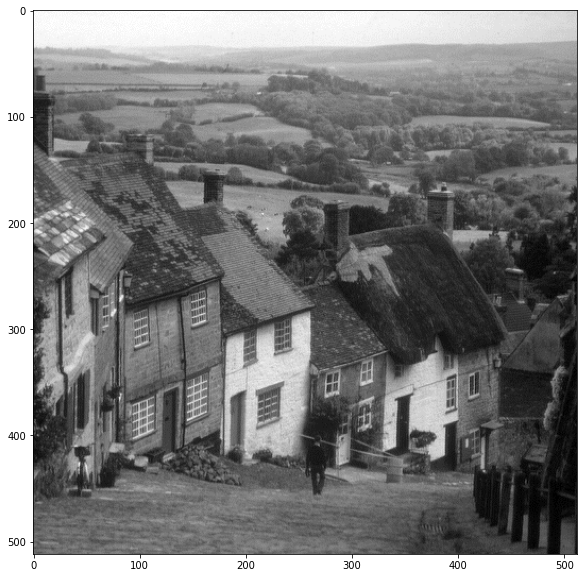

In [9]:
goldhill = cv2.imread(goldhill_image,cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(goldhill,cmap="gray")
plt.show()

In [10]:
hist = cv2.calcHist([goldhill],[0], None, [256], [0,256])

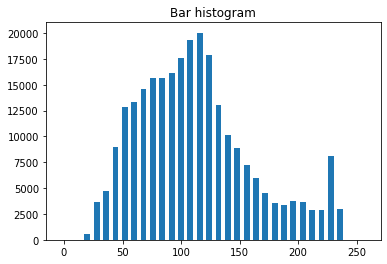

In [11]:
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

In [12]:
# We can convert it to a probability mass function by normalizing it by the number of pixels
PMF = hist / (goldhill.shape[0] * goldhill.shape[1])

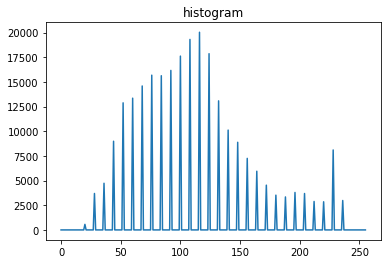

In [13]:
plt.plot(intensity_values,hist)
plt.title("histogram")
plt.show()

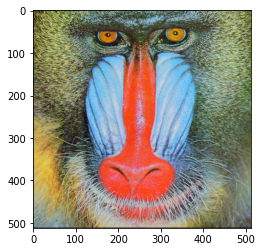

In [14]:
baboon = cv2.imread(baboon_image)
plt.imshow(cv2.cvtColor(baboon,cv2.COLOR_BGR2RGB))
plt.show()

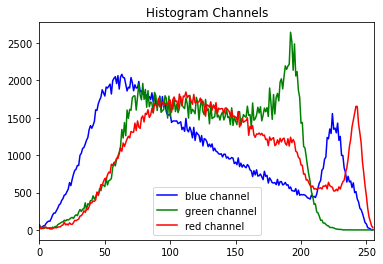

In [15]:
color = ('blue','green','red')
for i,col in enumerate(color):
    histr = cv2.calcHist([baboon],[i],None,[256],[0,256])
    plt.plot(intensity_values,histr,color = col,label=col+" channel")
    
    plt.xlim([0,256])
plt.legend()
plt.title("Histogram Channels")
plt.show()

# Intensity Transformations


In [16]:
toy_image

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

In [17]:
neg_toy_image = -1 * toy_image + 255
neg_toy_image

array([[255, 253, 253],
       [254, 254, 254],
       [254, 254, 253]], dtype=int16)

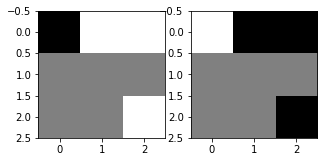

In [18]:
plt.figure(figsize=(5,5))
plt.subplot(1, 2, 1) 
plt.imshow(toy_image,cmap="gray")

plt.subplot(1, 2, 2)
plt.imshow(neg_toy_image,cmap="gray")
plt.show()

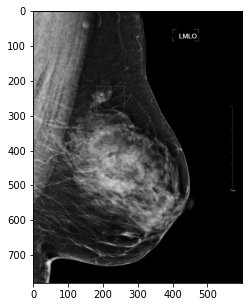

In [19]:
image = cv2.imread(mammogram_image, cv2.IMREAD_GRAYSCALE)


plt.figure(figsize = (5,5))
plt.imshow(image, cmap="gray")
plt.show()

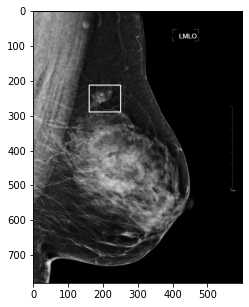

In [20]:
image = cv2.imread(mammogram_image, cv2.IMREAD_GRAYSCALE)
cv2.rectangle(image, pt1=(160, 212), pt2=(250, 289), color = (255), thickness=2)  #pt1 & pt2 retangle start end point

plt.figure(figsize = (5,5))
plt.imshow(image, cmap="gray")
plt.show()

In [21]:
img_neg = -1 * image + 255

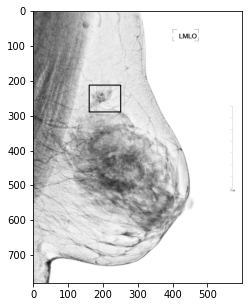

In [22]:
plt.figure(figsize=(5,5))
plt.imshow(img_neg, cmap = "gray")
plt.show()

#Brightness and contrast adjustments

In [23]:
alpha = 1 # Simple contrast control
beta = 100   # Simple brightness control   
goldhill = cv2.imread(goldhill_image)
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

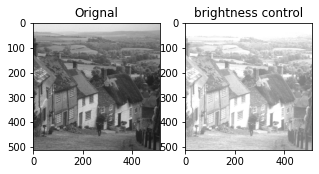

In [24]:
plot_image(goldhill, new_image, title_1 = "Orignal", title_2 = "brightness control")

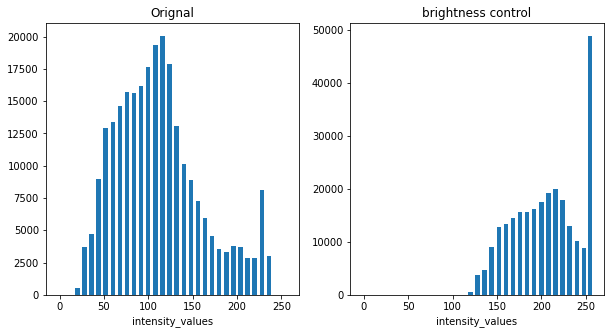

In [25]:
plt.figure(figsize=(10,5))
plot_histgram(goldhill, new_image, "Orignal", "brightness control")

In [26]:
plt.figure(figsize=(10,5))
alpha = 2# Simple contrast control
beta = 0 # Simple brightness control   # Simple brightness control
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

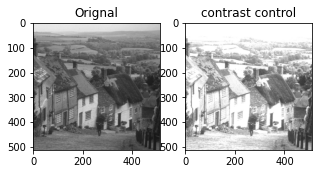

In [27]:
plot_image(goldhill,new_image,"Orignal","contrast control")

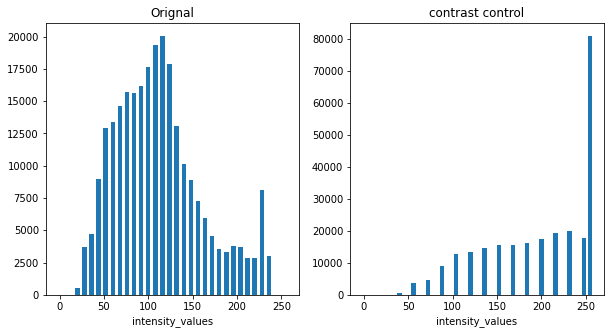

In [28]:
plt.figure(figsize=(10,5))
plot_histgram(goldhill, new_image,"Orignal","contrast control")

In [29]:
plt.figure(figsize=(10,5))
alpha = 3 # Simple contrast control
beta = -200  # Simple brightness control   
new_image = cv2.convertScaleAbs(goldhill, alpha=alpha, beta=beta)

<Figure size 720x360 with 0 Axes>

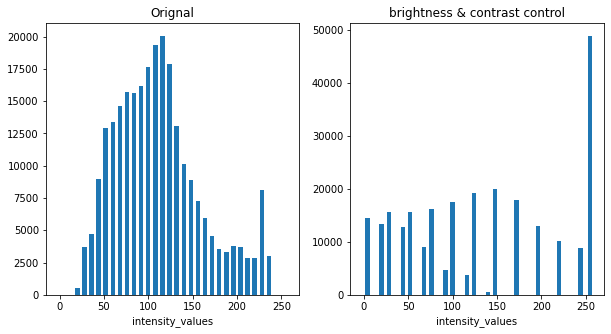

In [30]:
plt.figure(figsize=(10,5))
plot_histgram(goldhill, new_image, "Orignal", "brightness & contrast control")

#Histogram Equalization

In [31]:
zelda = cv2.imread(zelda_image, cv2.IMREAD_GRAYSCALE)
new_image = cv2.equalizeHist(zelda) #Histogram Equalization increases the contrast of images,

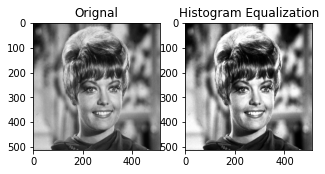

In [32]:
plot_image(zelda,new_image,"Orignal","Histogram Equalization")

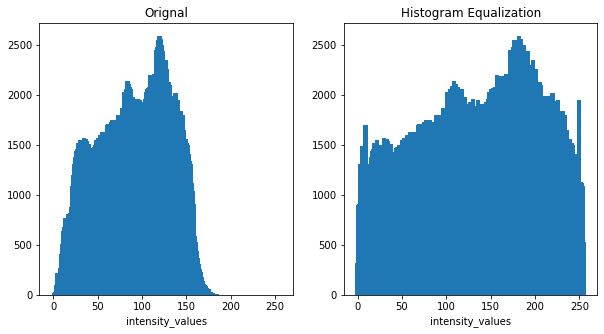

In [34]:
plt.figure(figsize=(10,5))
plot_histgram(zelda, new_image,"Orignal","Histogram Equalization")

#Thresholding and Simple Segmentation

In [38]:
def thresholding(input_image,threshold, max_value=255, min_value=0):
    N, M = input_image.shape
    image_out = np.zeros((N, M), dtype=np.uint8)

    for i in range(N):
        for j in range(M):
            if input_image[i, j] > threshold:
                image_out[i, j] = max_value
            else:
                image_out[i, j] = min_value
    return image_out


In [36]:
toy_image

array([[0, 2, 2],
       [1, 1, 1],
       [1, 1, 2]], dtype=uint8)

In [39]:
threshold = 1
max_value = 2
min_value = 0
thresholding_toy = thresholding(toy_image, threshold=threshold, max_value=max_value, min_value=min_value)
thresholding_toy

array([[0, 2, 2],
       [0, 0, 0],
       [0, 0, 2]], dtype=uint8)

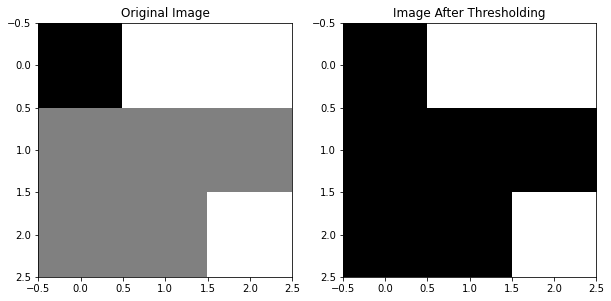

In [40]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(toy_image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholding_toy, cmap="gray")
plt.title("Image After Thresholding")
plt.show()

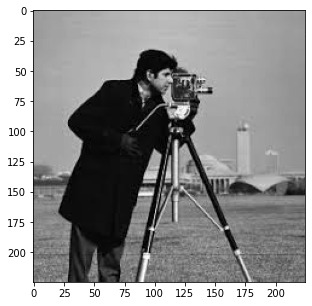

In [42]:
image = cv2.imread(cameraman_image, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap="gray")
plt.show()

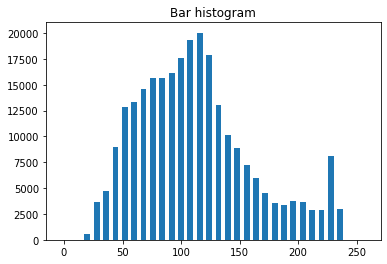

In [43]:
hist = cv2.calcHist([goldhill], [0], None, [256], [0, 256])
plt.bar(intensity_values, hist[:, 0], width=5)
plt.title("Bar histogram")
plt.show()

In [44]:
threshold = 87
max_value = 255
min_value = 0
new_image = thresholding(image, threshold=threshold, max_value=max_value, min_value=min_value)

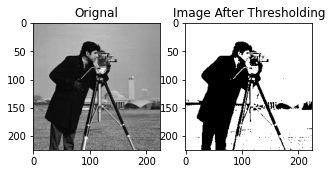

In [45]:
plot_image(image, new_image, "Orignal", "Image After Thresholding")

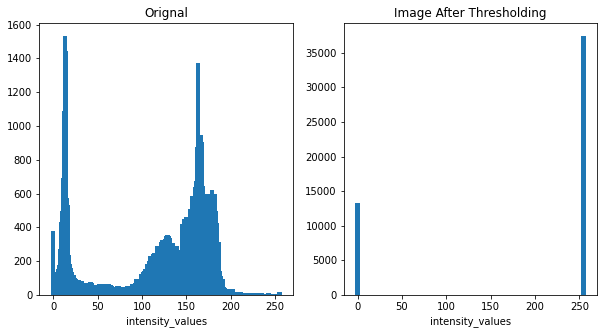

In [46]:
plt.figure(figsize=(10,5))
plot_histgram(image, new_image, "Orignal", "Image After Thresholding")

In [47]:
cv2.THRESH_BINARY

0

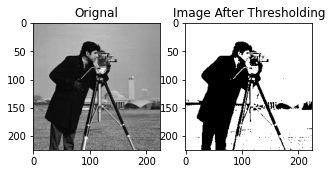

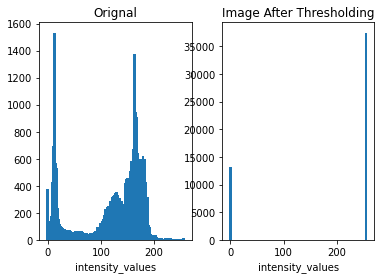

In [48]:
ret, new_image = cv2.threshold(image,threshold,max_value,cv2.THRESH_BINARY)
plot_image(image,new_image,"Orignal","Image After Thresholding")
plot_histgram(image, new_image,"Orignal","Image After Thresholding")

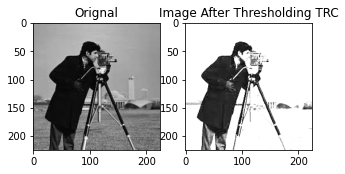

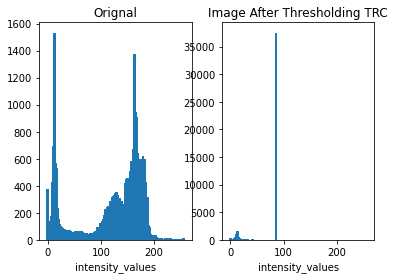

In [50]:
#cv2.THRESH_TRUNC will not change the values if the pixels are less than the threshold value
ret, new_image = cv2.threshold(image,86,255,cv2.THRESH_TRUNC)
plot_image(image,new_image,"Orignal","Image After Thresholding TRC")
plot_histgram(image, new_image,"Orignal","Image After Thresholding TRC")

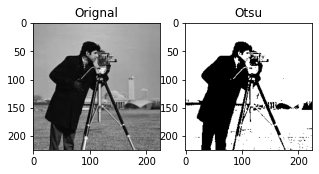

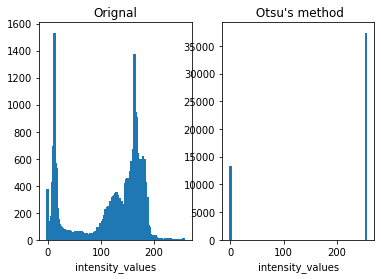

In [51]:
#Otsu's method cv2.THRESH_OTSU avoids having to choose a value and determines it automatically, using the histogram
ret, otsu = cv2.threshold(image,0,255,cv2.THRESH_OTSU)
plot_image(image,otsu,"Orignal","Otsu")
plot_histgram(image, otsu,"Orignal"," Otsu's method")